In [2]:
!pip install pandas
import pandas as pd
!pip install plotly
import plotly.graph_objects as go
import plotly.express as px
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
!pip install geopandas
import geopandas as gpd



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Read the data from the CSV file
df = pd.read_csv('world_population.csv')

In [4]:
# Create the Choropleth map
fig1 = go.Figure(data=go.Choropleth(
    locations=df['CCA3'],
    locationmode='ISO-3',
    z=df['Rank'],
    colorscale='Blues',
    marker_line_color='white',  # Set border line color to white
    colorbar_title='Rank',
    hovertemplate='<b>%{location}</b><br>Rank: %{z:.2f}',
))

In [5]:
fig1.update_layout(
    title='Rank Choropleth Map',
    geo=dict(
        showframe=False,  # Hide map frame
        showcoastlines=False,  # Hide coastlines
        projection_type='equirectangular',  # Choose a projection type
    ),
)

In [6]:
fig1.show()

In [7]:
# Read the CSV file
data = pd.read_csv('world_population.csv')

In [8]:
# Select the columns you want to use for the heatmap
columns = ['Country/Territory', '2022 Population', '2020 Population', '2015 Population', '2010 Population',
           '2000 Population', '1990 Population', '1980 Population', '1970 Population', 'Area (km²)', 'Density',
           'Growth Rate', 'World Population Percentage']

In [9]:
# Load the world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\saite\AppData\Local\Temp\ipykernel_35192\3572919206.py:2: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



In [10]:
# Merge the world shapefile with the data based on the 'Country/Territory' column
merged_data = world.merge(data, left_on='name', right_on='Country/Territory')

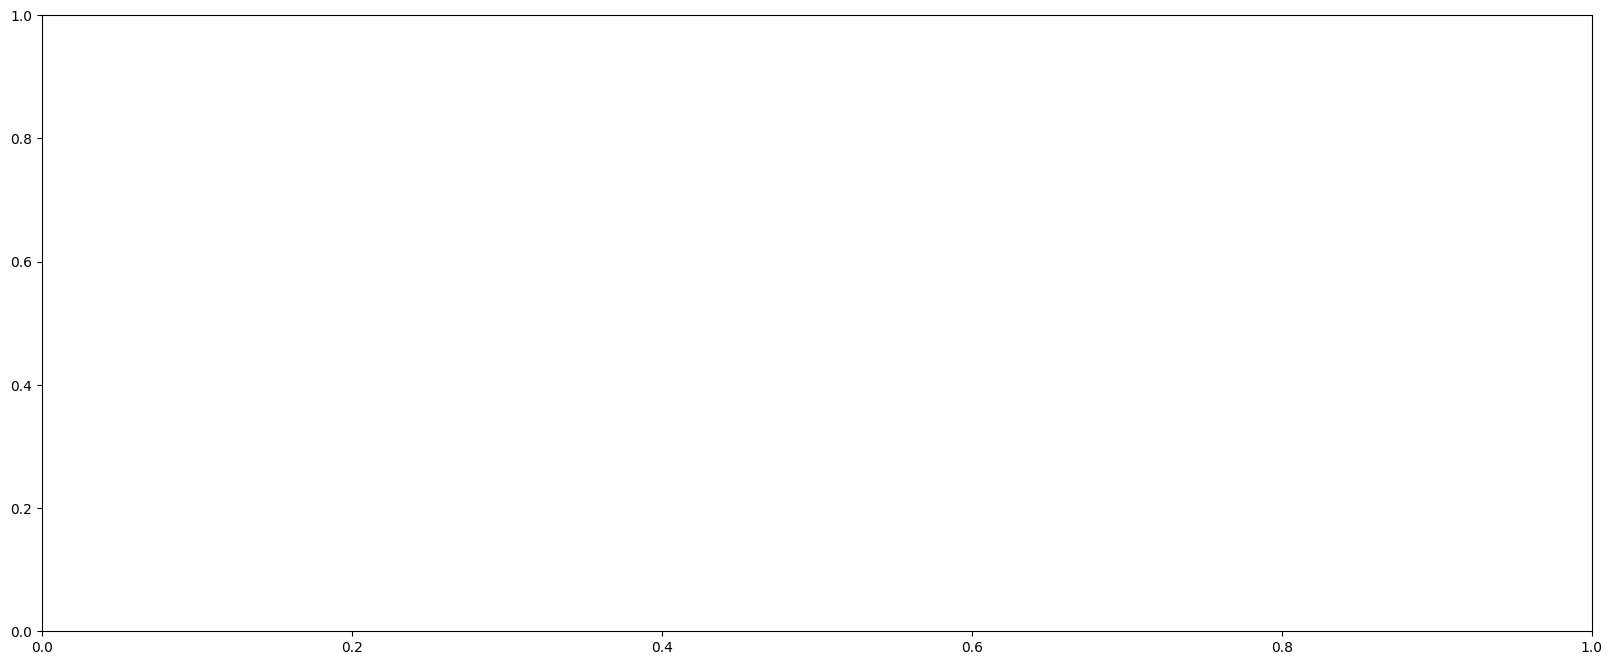

In [11]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(20, 8))

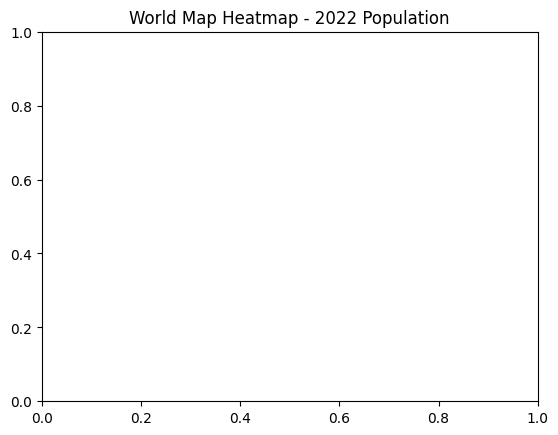

In [17]:
# Plot the world map
merged_data.plot(column='2022 Population', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
# Set the title and axis labels
plt.title('World Map Heatmap - 2022 Population')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
# Show the plot
plt.show()

To visualizae Country and Capital City using Point Map

In [18]:
# Read the CSV file
data = pd.read_csv('world_population.csv')

In [19]:
# Filter the data for CCA3 and Capital columns
filtered_data = data[['CCA3', 'Capital']]

In [20]:
# Create the point map visualization
fig = px.scatter_geo(filtered_data, locations='CCA3', locationmode='ISO-3', hover_name='Capital')

In [21]:
# Show the plot
fig.show()

In [22]:
# Read the CSV file
data = pd.read_csv('world_population.csv')
# Convert the "2022 Population" column to integer
data['2022 Population'] = data['2022 Population'].astype(int)

In [23]:
# Create a proportional symbol map using Plotly Express
fig = px.scatter_geo(data, locations='CCA3', color='Continent', hover_name='Country/Territory',
                     size='2022 Population', projection='natural earth')

In [24]:
# Customize the map layout
fig.update_layout(
    title='Proportional Symbol Map of Population by Continent',
    legend_title='Continent',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

In [ ]:
# Display the map
fig.show()

Another point map visualization

In [25]:
# Read the CSV file
df = pd.read_csv('world_population.csv')
# Convert the "2022 Population" column to integer
df['2022 Population'] = df['2022 Population'].astype(int)
# Filter the data by continent and total 2022 population
filtered_data = df[['Continent', '2022 Population']].groupby('Continent').sum()

In [26]:
# Load the world map shapefile
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\saite\AppData\Local\Temp\ipykernel_35192\3994893438.py:2: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



In [27]:
# Merge the world map data with the filtered data
merged_data = world_map.merge(filtered_data, left_on='continent', right_index=True)

Text(0.5, 1.0, 'Proportional Symbol Map - Total 2022 Population by Continent')

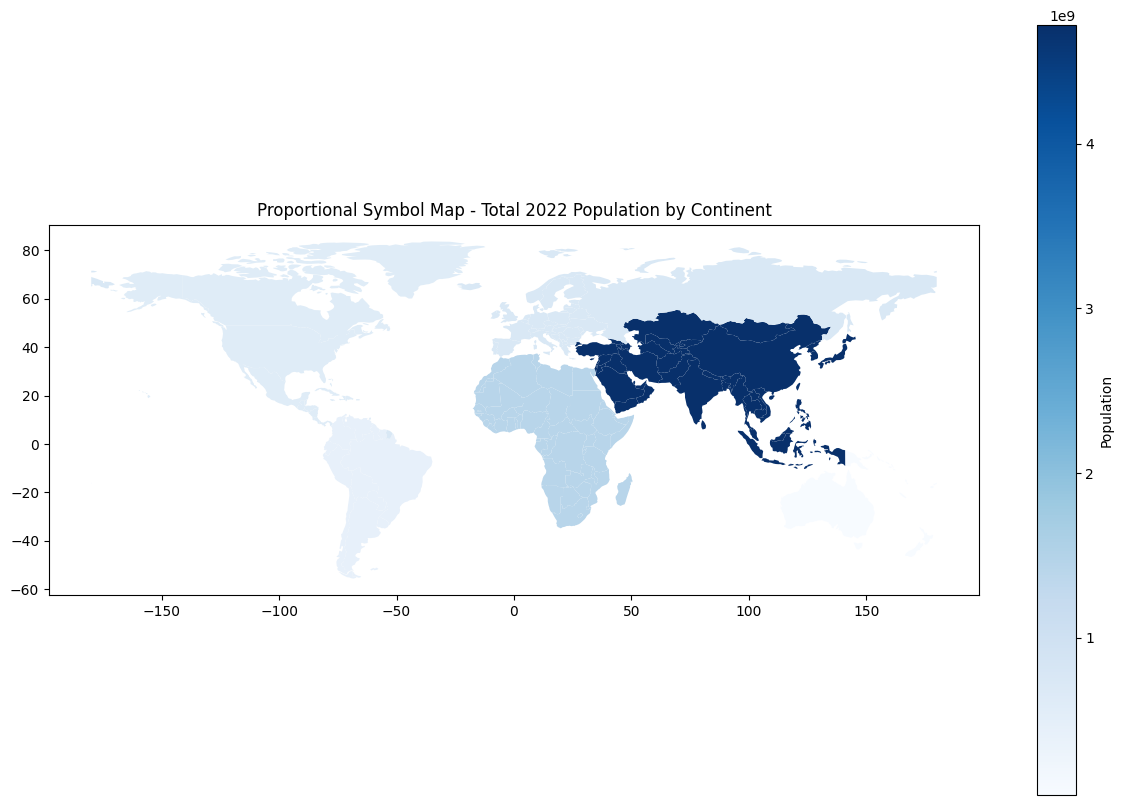

In [29]:
# Create a proportional symbol map using the '2022 Population' column
fig, ax = plt.subplots(figsize=(15, 10))
merged_data.plot(ax=ax, column='2022 Population', cmap='Blues', legend=True, legend_kwds={'label': "Population"})

plt.title("Proportional Symbol Map - Total 2022 Population by Continent")

In [30]:
plt.show()